<a href="https://colab.research.google.com/github/Kartavya-Jharwal/Kartavya_Business_Analytics2025/blob/main/Class_Assignments/week10/Week_10_Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Fundamentals of Business Analytics - Week 10 Session 1

## Notes

- Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the data.

- A scatter plot can be used to:  
	- Visualize the relationship between X  and Y variables.
	  
- Only one independent variable, X.  
- Relationship between X and Y is described by a linear function.  
- Changes in Y are assumed to be related to changes in X.  


#### Simple Linear Regression Model  

- Yi = β0 + β1Xi + εi
- Dependent Variable = Population Y intercept + (Population Slope Coefficient * Independent Variable) + Random Error term  
 - The simple linear regression equation provides an estimate of the population regression line.
   
- b0 is the estimated mean value of Y when the value of X is zero.
- b1 is the estimated change in the mean value of Y as a result of a one-unit increase in X.
  
  - homoscedasciticty



# House Price Prediction Using Simple Linear Regression
A real estate agent wishes to examine the relationship between the selling price of a home and its size (measured in square feet).
This notebook reads house price data from a CSV file, visualizes it with a scatter plot, and performs simple linear regression to model the relationship between house size and price.

In [1]:
# IMPORT OUR LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# plotting defaults
sns.set(style='whitegrid')
%matplotlib inline

## STEP 1 - SET OBJECTIVE

**t test for a population slope:**

Is there a linear relationship between House prices and Size?

Null and alternative hypotheses:

H0: β1 = 0 (no linear relationship)

H1: β1 ≠ 0 (linear relationship does exist)

Significance level: 0.05 (95% CI)

In [3]:
# Main analysis: load data, visualize, fit OLS, report t-test and 95% CI for slope
df = pd.read_csv('https://raw.githubusercontent.com/Kartavya-Jharwal/Kartavya_Business_Analytics2025/refs/heads/main/Class_Assignments/week10/house_prices.csv')
print("Loaded 'house_prices.csv'.")

# quick head
print(df.head())

Loaded 'house_prices.csv'.
   price  area
0    245  1400
1    312  1600
2    279  1700
3    308  1875
4    199  1100


# Scatter Plot


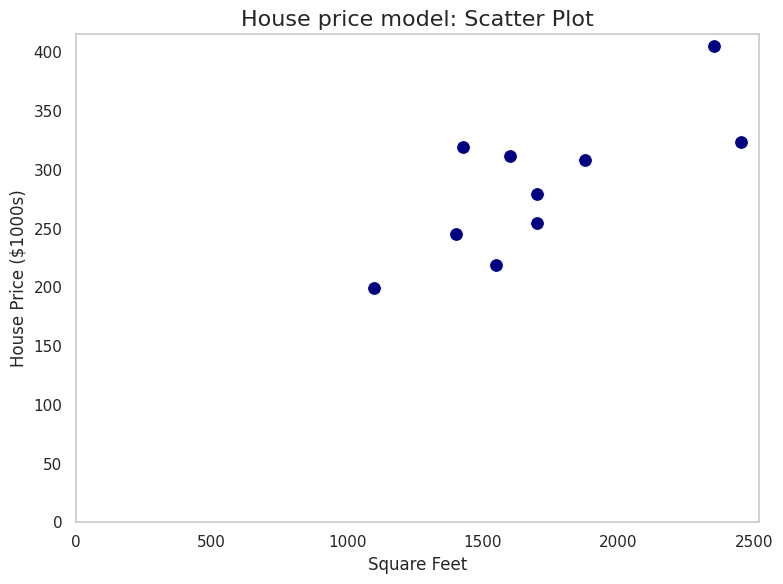

In [7]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="area", y="price", s=100, color='navy')
plt.title("House price model: Scatter Plot", fontsize=16)
plt.xlabel("Square Feet", fontsize=12)
plt.ylabel("House Price ($1000s)", fontsize=12)
plt.grid(False)
plt.xlim(0)
plt.ylim(0)
plt.tight_layout()
plt.show()

# RUN THE LINEAR REGRESSION

In [11]:
# Linear regression
X = df["area"]
y = df["price"]
# Use formula-based interface instead of sm.OLS
model = smf.ols('price ~ area', data=df).fit()
print('\n=== OLS Summary ===')
print(model.summary())


=== OLS Summary ===
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     11.08
Date:                Mon, 10 Nov 2025   Prob (F-statistic):             0.0104
Time:                        14:23:54   Log-Likelihood:                -50.290
No. Observations:                  10   AIC:                             104.6
Df Residuals:                       8   BIC:                             105.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.2483     58.03

# Hypothesis Test for the Slope Using the Student's t-Distribution
To test whether the independent variable (e.g., area) significantly predicts the dependent variable (e.g., price), we perform a t-test on the slope coefficient using the Student’s t-distribution.

Hypotheses:
Null Hypothesis (no relationship between area and price)
H0: β1 = 0

Alternative Hypothesis (a significant linear relationship exists)  
H1:β1 ≠ 0

The t-statistic measures how many standard errors the estimated slope is away from zero

In [13]:
# t-test for slope (area)
slope_t = model.tvalues['area']
slope_p = model.pvalues['area']
ci = model.conf_int(alpha=0.05).loc['area']

print(f"\nSlope t-statistic: {slope_t:.4f}")
print(f"Slope p-value: {slope_p:.4e}")
print(f"95% CI for slope: [{ci[0]:.4f}, {ci[1]:.4f}]")

alpha = 0.05
if slope_p < alpha:
    print('\nConclusion: Reject H0 — there is evidence of a linear relationship between area and Price at alpha=0.05.')
else:
    print('\nConclusion: Fail to reject H0 — no evidence of linear relationship at alpha=0.05.')


Slope t-statistic: 3.3294
Slope p-value: 1.0394e-02
95% CI for slope: [0.0337, 0.1858]

Conclusion: Reject H0 — there is evidence of a linear relationship between area and Price at alpha=0.05.


# Plot R@

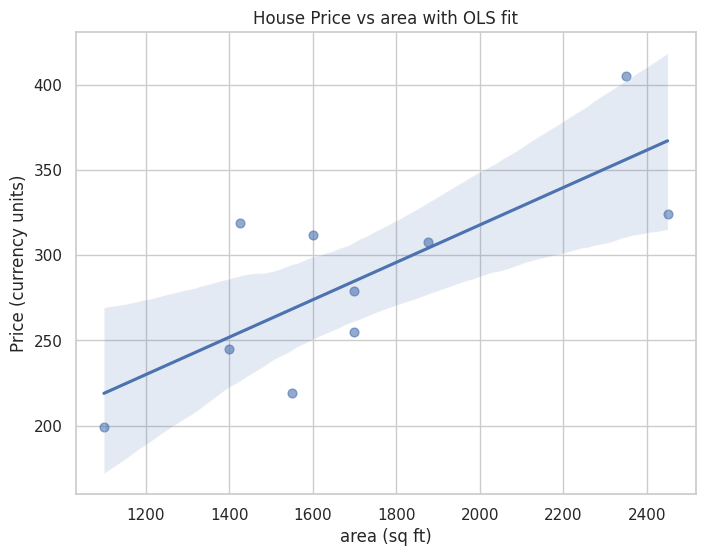

In [16]:
# plot regression line
plt.figure(figsize=(8,6))
sns.regplot(x='area', y='price', data=df, ci=95, scatter_kws={'s':40, 'alpha':0.6})
plt.title('House Price vs area with OLS fit')
plt.xlabel('area (sq ft)')
plt.ylabel('Price (currency units)')
plt.show()